<a href="https://colab.research.google.com/github/Sugirjan/NumericImageClassifier/blob/master/notebooks/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy import mean
from numpy import std
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.constraints import max_norm
from keras.layers import Conv2D, Conv2DTranspose

Using TensorFlow backend.


In [ ]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset which has images with 28 by 28 pixels to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [ ]:
# encoding 
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [ ]:
# define cnn model
def define_model():
  # Creating a Sequential Model and adding the layers
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
  # Flattening the 2D arrays for fully connected layers
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	model.compile(optimizer=SGD(lr=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [ ]:

# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)

# Add noise for data
noise_factor = 0.5
trainX_noisy = trainX + noise_factor * np.random.normal(loc = 0.0, scale=1.0, size=trainX.shape)
testX_noisy = testX + noise_factor * np.random.normal(loc = 0.0, scale=1.0, size=testX.shape)
trainX_noisy = np.clip(trainX_noisy, 0. , 1.)
testX_noisy = np.clip(testX_noisy, 0. , 1.)

# define model
model = define_model()
# fit model
model.fit(trainX_noisy, trainY, epochs=4, batch_size=32, verbose=1, validation_data=(testX_noisy, testY))
_, acc = model.evaluate(testX_noisy, testY, verbose=1)
print('> %.3f' % (acc * 100.0))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 84s 1ms/step - loss: 0.2719 - accuracy: 0.9110 - val_loss: 0.1306 - val_accuracy: 0.9546
Epoch 2/4
60000/60000 [==============================] - 83s 1ms/step - loss: 0.1172 - accuracy: 0.9617 - val_loss: 0.0958 - val_accuracy: 0.9695
Epoch 3/4
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0866 - accuracy: 0.9715 - val_loss: 0.0975 - val_accuracy: 0.9674
Epoch 4/4
10000/10000 [==============================] - 5s 467us/step
> 97.210


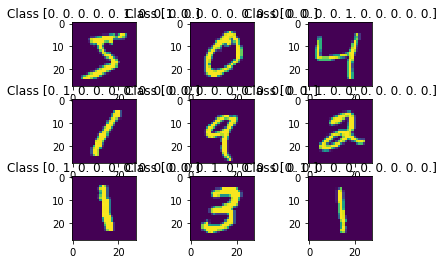

In [ ]:
import matplotlib.pyplot as plt

def print_images(X_train, y_train):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(X_train[i].reshape(28,28), interpolation='none')
        plt.title("Class {}".format(y_train[i]))
print_images(trainX, trainY)

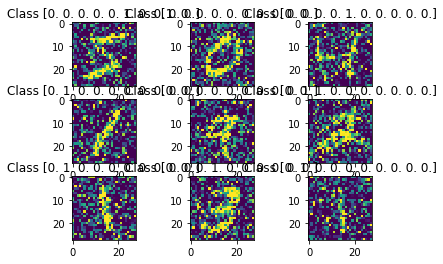

In [ ]:
print_images(trainX_noisy, trainY)